In [3]:
from statsbombpy import sb
import pandas as pd
from mplsoccer import VerticalPitch,Pitch,FontManager
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from matplotlib.colors import LinearSegmentedColormap
pd.set_option('display.max_columns',113)
pd.set_option('display.max_rows',113)

In [3]:
sb.competitions()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
5,16,2,Europe,Champions League,male,False,False,2016/2017,2024-02-13T02:37:32.205154,2021-06-13T16:17:31.694,None,2024-02-13T02:37:32.205154
6,16,27,Europe,Champions League,male,False,False,2015/2016,2024-06-12T07:45:38.786894,2021-06-13T16:17:31.694,None,2024-06-12T07:45:38.786894
7,16,26,Europe,Champions League,male,False,False,2014/2015,2024-02-12T12:49:54.914228,2021-06-13T16:17:31.694,None,2024-02-12T12:49:54.914228
8,16,25,Europe,Champions League,male,False,False,2013/2014,2024-02-12T12:48:48.479157,2021-06-13T16:17:31.694,None,2024-02-12T12:48:48.479157
9,16,24,Europe,Champions League,male,False,False,2012/2013,2024-02-12T12:47:34.340413,2021-06-13T16:17:31.694,None,2024-02-12T12:47:34.340413


In [4]:
country="Europe"
division="UEFA Euro"
season="2024"
gender="male"
competition_id = 55
season_id = 282

events_df = sb.competition_events(
    country=country,
    division=division,
    season=season,
    gender=gender)

In [15]:
events_df.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'block_save_block',
       'carry_end_location', 'clearance_aerial_won',
       ...
       'substitution_outcome', 'substitution_outcome_id',
       'substitution_replacement', 'substitution_replacement_id', 'tactics',
       'team', 'team_id', 'timestamp', 'type', 'under_pressure'],
      dtype='object', length=114)

In [61]:
events_df['type'].unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Miscontrol', 'Ball Recovery', 'Foul Committed',
       'Foul Won', 'Dribbled Past', 'Dribble', 'Block', 'Interception',
       'Duel', 'Goal Keeper', 'Clearance', 'Dispossessed', 'Shot',
       'Injury Stoppage', 'Player Off', 'Player On', 'Referee Ball-Drop',
       '50/50', 'Substitution', 'Tactical Shift', 'Half End',
       'Bad Behaviour', 'Shield', 'Error', 'Own Goal Against',
       'Own Goal For', 'Offside'], dtype=object)

In [17]:
# filter team pressure events
team_list = ["Spain","England","Portugal","France","Italy","Switzerland","Slovakia","Romania","Netherlands","Austria","Turkey","Germany","Denmark","Georgia","Belgium","Slovenia"]
#mask_pressure = (events_df.team == team) & (events_df.type == 'Pressure')
#df = events_df.loc[mask_pressure, ['location']]
#df['x'] = df.apply(lambda x: x['location'][0],axis=1)
#df['y'] = df.apply(lambda x: x['location'][1],axis=1)
team_dfs = {}
for team in team_list:
    mask_pressure = (events_df['team'] == team) & (events_df['type'] == 'Pressure')
    team_df = events_df.loc[mask_pressure, ['location']].copy()
    team_df['x'] = team_df['location'].apply(lambda loc: loc[0])
    team_df['y'] = team_df['location'].apply(lambda loc: loc[1])
    team_df = team_df.drop(columns=['location'])
    team_dfs[team] = team_df

In [8]:
# Example: Accessing the dataframe for Spain
print(team_dfs['Spain'])

           x     y
150155  64.9  78.1
150159  99.6  55.4
150160  69.6  73.4
150162  70.4  72.5
150166  69.6  70.8
...      ...   ...
163925  19.0  13.9
163926  26.2  10.8
163927  35.8  15.3
163931  47.8  78.3
163933  39.6  52.8

[1128 rows x 2 columns]


In [9]:
# see the custom colormaps example for more ideas on setting colormaps
pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#15242e', '#4393c4'], N=10)

# fontmanager for google font (robotto)
robotto_regular = FontManager()

path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]

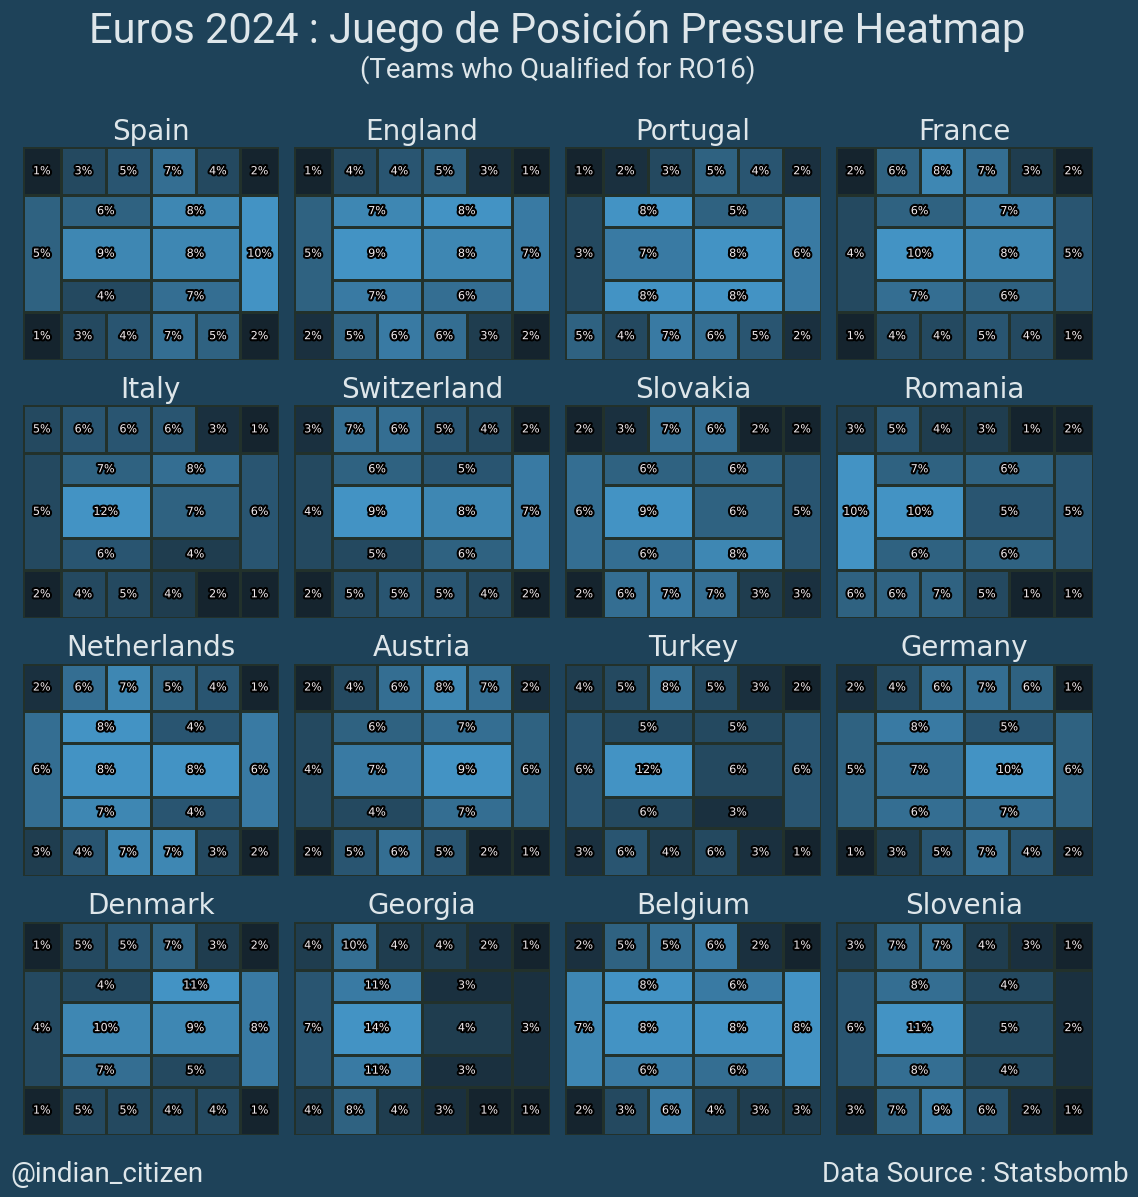

In [60]:
# Create a 4x4 grid of plots
fig, axs = plt.subplots(4, 4, figsize=(11, 12))
fig.set_facecolor('#1e4259')
fig.suptitle("Euros 2024 : Juego de Posición Pressure Heatmap", fontsize=30, color='#dee6ea',fontproperties=robotto_regular.prop)
fig.text(0.5, 0.93, '(Teams who Qualified for RO16)', ha='center', va='center', fontsize=20, fontproperties=robotto_regular.prop, color='#dee6ea')

# Flatten the axs array for easier iteration
axs = axs.flatten()

for ax, team in zip(axs, team_list):
    df = team_dfs[team]
    
    pitch = Pitch(pitch_type='statsbomb', line_zorder=2,linewidth=2, pitch_color='#1e4259')
    
    # Heatmap and labels
    bin_statistic = pitch.bin_statistic_positional(df['x'], df['y'], statistic='count',
                                                   positional='full', normalize=True)
    pitch.heatmap_positional(bin_statistic, ax=ax, cmap=pearl_earring_cmap, edgecolors='#22312b')  # Adjust cmap as needed
    pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=8, ax=ax, ha='center', va='center', str_format='{:.0%}',path_effects=path_eff)
    
    # Set title for each subplot
    ax.set_title(team, fontsize=20, color='#dee6ea')
    
    # Remove axis labels for cleaner look
    ax.axis('off')

# Add an endnote
fig.text(0.09, 0.01, '@indian_citizen', ha='center', va='center', fontsize=20, fontproperties=robotto_regular.prop, color='#dee6ea')
fig.text(0.88, 0.01, 'Data Source : Statsbomb', ha='center', va='center', fontsize=20, fontproperties=robotto_regular.prop, color='#dee6ea')
# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('C:/Users/acer/Desktop/IndianCityzen/Projects/Images/Euros-2024/Pressure_heatmap.png',dpi=500,bbox_inches = 'tight',facecolor='#1e4259')

Text(0.5, 0.5, 'Pressure applied by\n Spain in Euros 2024')

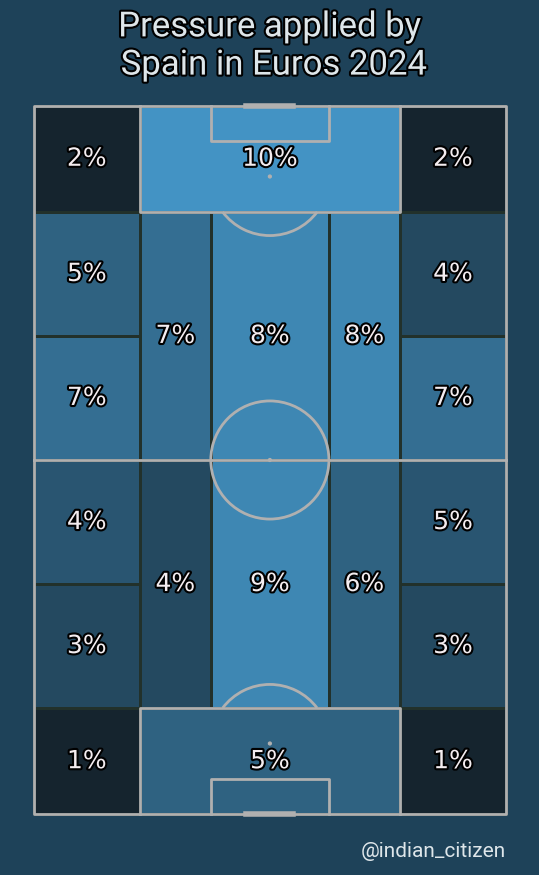

In [16]:
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#1e4259')
fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0,
                      title_height=0.08, title_space=0,
                      axis=False,
                      grid_height=0.84)
fig.set_facecolor('#1e4259')

# heatmap and labels
bin_statistic = pitch.bin_statistic_positional(df.x, df.y, statistic='count',
                                               positional='full', normalize=True)
pitch.heatmap_positional(bin_statistic, ax=axs['pitch'],
                         cmap=pearl_earring_cmap, edgecolors='#22312b')
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=axs['pitch'], ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)

# endnote and title
axs['endnote'].text(1, 0.5, '@indian_citizen', va='center', ha='right', fontsize=15,
                    fontproperties=robotto_regular.prop, color='#dee6ea')
axs['title'].text(0.5, 0.5, f"Pressure applied by\n {team} in Euros 2024", color='#dee6ea',
                  va='center', ha='center', path_effects=path_eff,
                  fontproperties=robotto_regular.prop, fontsize=25)